In [1]:
import pandas as pd

In [5]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [6]:
dftrain_backup = dftrain.copy()
dfeval_backup = dfeval.copy()

In [14]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [8]:
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [10]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [11]:
dfeval.describe()

,survived,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.375000,28.720985,0.469697,0.386364,27.023880
std,0.485042,14.157538,0.978393,0.837775,34.973108
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,13.250000
75%,1.000000,35.250000,1.000000,0.000000,27.900000
max,1.000000,74.000000,8.000000,6.000000,263.000000


In [12]:
dfeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-null    int64  
 1   sex                 264 non-null    object 
 2   age                 264 non-null    float64
 3   n_siblings_spouses  264 non-null    int64  
 4   parch               264 non-null    int64  
 5   fare                264 non-null    float64
 6   class               264 non-null    object 
 7   deck                264 non-null    object 
 8   embark_town         264 non-null    object 
 9   alone               264 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.8+ KB


<Axes: >

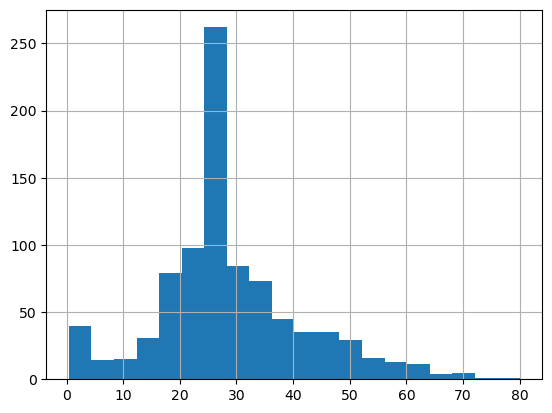

In [22]:
pd.concat([dftrain, dfeval]).age.hist(bins=20)

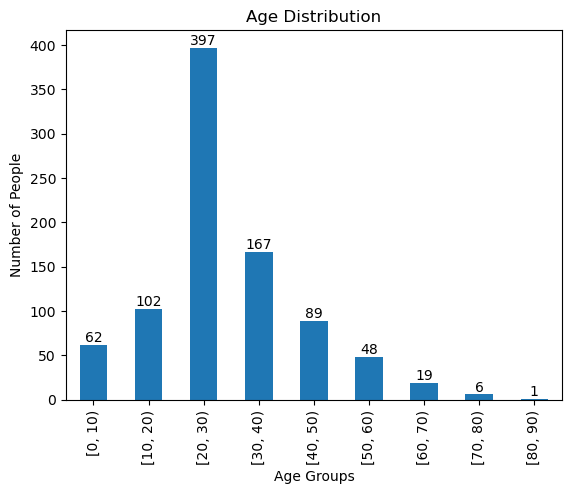

In [29]:
concated_frame = pd.concat([dftrain, dfeval], ignore_index=True)

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

age_groups = pd.cut(concated_frame['age'], bins=bins, right=False)
grouped_counts = age_groups.value_counts().sort_index()
ax = grouped_counts.plot(kind='bar', xlabel='Age Groups', ylabel='Number of People', title='Age Distribution')

for i, count in enumerate(grouped_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')